In [23]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib

In [24]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df)  # df = your dataset

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

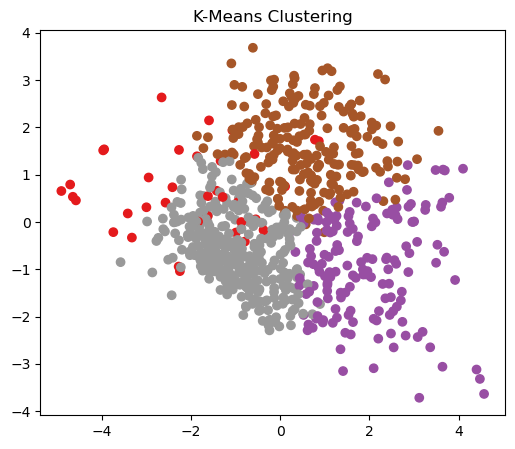

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='Set1')
plt.title("K-Means Clustering")
plt.show()

In [31]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=4, random_state=42, affinity='nearest_neighbors')
spectral_labels = spectral.fit_predict(X_scaled)

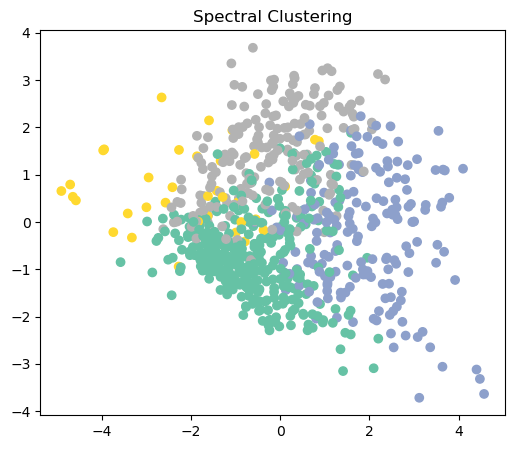

In [32]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=spectral_labels, cmap='Set2')
plt.title("Spectral Clustering")
plt.show()

In [33]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

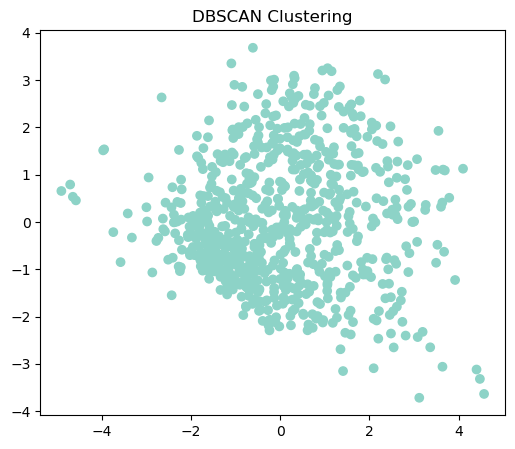

In [34]:

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='Set3')
plt.title("DBSCAN Clustering")
plt.show()

In [35]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

clustering_results = {
    "KMeans": kmeans_labels,
    "Spectral": spectral_labels,
    "DBSCAN": dbscan_labels
}

for name, labels in clustering_results.items():
    if len(set(labels)) > 1:  # silhouette score needs >1 cluster
        sil = silhouette_score(X_scaled, labels)
        ch = calinski_harabasz_score(X_scaled, labels)
        db = davies_bouldin_score(X_scaled, labels)
        print(f"{name} -> Silhouette: {sil:.3f}, Calinski-Harabasz: {ch:.3f}, Davies-Bouldin: {db:.3f}")
    else:
        print(f"{name} -> Only one cluster detected, metrics not applicable.")


KMeans -> Silhouette: 0.216, Calinski-Harabasz: 138.900, Davies-Bouldin: 1.589
Spectral -> Silhouette: 0.184, Calinski-Harabasz: 120.206, Davies-Bouldin: 1.665
DBSCAN -> Only one cluster detected, metrics not applicable.


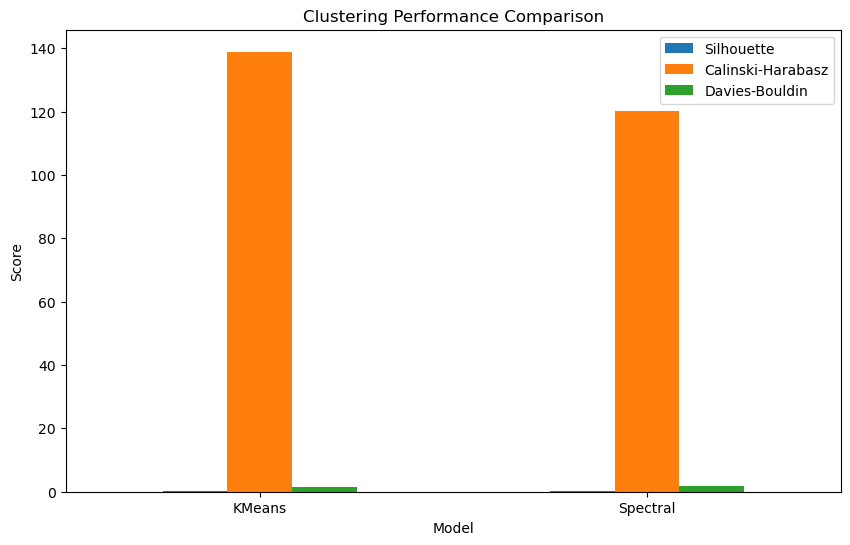

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare metrics
metrics = {"Model": [], "Silhouette": [], "Calinski-Harabasz": [], "Davies-Bouldin": []}

for name, labels in clustering_results.items():
    if len(set(labels)) > 1:
        metrics["Model"].append(name)
        metrics["Silhouette"].append(silhouette_score(X_scaled, labels))
        metrics["Calinski-Harabasz"].append(calinski_harabasz_score(X_scaled, labels))
        metrics["Davies-Bouldin"].append(davies_bouldin_score(X_scaled, labels))

df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model", inplace=True)

# Plot metrics as grouped bar chart
df_metrics.plot(kind="bar", figsize=(10,6))
plt.title("Clustering Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.show()